In [86]:
import re
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [48]:
file = "5kkk.pdb"

def parsePDB(filename, hetero = False):
    '''
    in: name of file and boolean for normal or hetero atom. Default is False, returns normal atoms.
    out: file containing atoms in pdb format.
    
    '''
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        if hetero == False:
            atom_file = open("atomfile.txt", "w+")
            for line in lines:
                if re.search("^ATOM", line):
                    if re.search("CA", line):
                        atom_file.write(line)
        if hetero == True:
            hetero_file = open("heterofile.txt", "w+")
            for line in lines:
                if re.search("^HETATM", line):
                        hetero_file.write(line)

parsePDB(file)

In [205]:
def get_coords(filename):
    '''
    in: PDB file with only CA atoms
    out: matrix with coordinates of atoms
    '''
    
    coordinate_list = []
    with open(filename,'r') as infile:
        for line in infile:
            parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
            coordinate_list.append(parsed_line)
    
    coordinates = np.array(coordinate_list)
    return coordinates
get_coords(atom_file)

array([[  7.01190000e+01,  -1.61610000e+01,   7.76500000e+00],
       [  6.71660000e+01,  -1.77040000e+01,   9.62000000e+00],
       [  6.71700000e+01,  -1.77090000e+01,   9.59900000e+00],
       [  6.35100000e+01,  -1.74610000e+01,   8.59600000e+00],
       [  6.06900000e+01,  -1.71670000e+01,   1.11270000e+01],
       [  5.78950000e+01,  -1.97430000e+01,   1.12190000e+01],
       [  5.56080000e+01,  -1.70180000e+01,   9.83400000e+00],
       [  5.79400000e+01,  -1.65420000e+01,   6.86200000e+00],
       [  5.81170000e+01,  -2.03090000e+01,   6.26300000e+00],
       [  5.43310000e+01,  -2.04630000e+01,   6.21000000e+00],
       [  5.41410000e+01,  -1.77470000e+01,   3.51800000e+00],
       [  5.66200000e+01,  -1.98610000e+01,   1.54800000e+00],
       [  5.46870000e+01,  -2.30750000e+01,   2.00800000e+00],
       [  5.13180000e+01,  -2.14670000e+01,   1.26400000e+00],
       [  5.23260000e+01,  -2.03390000e+01,  -2.22200000e+00],
       [  5.41870000e+01,  -2.36300000e+01,  -2.8250000

In [233]:
def get_numbers(filename):
    '''
    in: PDB file with atoms
    out: matrix with numbers of atoms
    '''
    
    numbers = []
    with open(filename,'r') as infile:
        for line in infile:
            parsed_line = line[7:11].strip()
            parsed_line2 = int(parsed_line)
            numbers.append(parsed_line2)
    
    return numbers
get_numbers(atom_file)

[2,
 10,
 11,
 21,
 29,
 35,
 44,
 48,
 57,
 71,
 80,
 88,
 95,
 103,
 113,
 120,
 134,
 139,
 148,
 155,
 164,
 169,
 177,
 184,
 189,
 193,
 203,
 207,
 216,
 224,
 232,
 240,
 248,
 259,
 267,
 278,
 287,
 293,
 303,
 310,
 319,
 326,
 334,
 343,
 352,
 363,
 371,
 372,
 390,
 401,
 410,
 420,
 428,
 437,
 444,
 453,
 458,
 467,
 475,
 484,
 489,
 495,
 504,
 505,
 517,
 525,
 534,
 543,
 553,
 557,
 564,
 571,
 578,
 586,
 593,
 598,
 606,
 610,
 615,
 623,
 631,
 640,
 649,
 658,
 662,
 672,
 682,
 691,
 696,
 705,
 713,
 722,
 729,
 737,
 742,
 751,
 757,
 767,
 772,
 779,
 780,
 794,
 804,
 805,
 819,
 827,
 834,
 842,
 843,
 857,
 869,
 877,
 878,
 892,
 903,
 911,
 917,
 926,
 931,
 939,
 947,
 948,
 964,
 971,
 979,
 989,
 997,
 1015,
 1025,
 1032,
 1036,
 1044,
 1055,
 1059,
 1064,
 1072,
 1077,
 1086,
 1090,
 1095,
 1103,
 1111,
 1120,
 1125,
 1133,
 1142,
 1150,
 1161,
 1172,
 1181,
 1189,
 1197,
 1202,
 1207,
 1216,
 1228,
 1237,
 1246,
 1254,
 1258,
 1270,
 1279]

In [199]:
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"
residue_list = []

def list_residues(filename):
    with open(filename,'r') as infile:
        for line in infile:
            parsed_line = line[17:20]
            residue_list.append(parsed_line)
    
    return(residue_list)

In [200]:
def distance_to_center(filename):
    distances = []
    markers = []
    residues = list_residues(filename)
    hydrophobic = ['ALA' , 'CYS' , 'PHE' , 'ILE' , 'LEU' , 'MET' , 'PRO' , 'VAL' , 'TRP']
    
    coordinates = get_coords(filename)
    centroid = np.array(np.mean(coordinates, axis = 0))
    
    for coordinate in coordinates:
        distances.append(np.linalg.norm(centroid-coordinate))
    
    for residue in residues:
        if residue in hydrophobic:
            markers.append('PHOB')
        else:
            markers.append('PHIL')
    
    output = list(zip(distances, residues, markers))
    return(output)

In [201]:
def aa_split(filename):
    outputs = distance_to_center(filename)
    phob_outputs = []
    phil_outputs = []
    for output in outputs:
        if (output[2] == 'PHOB'):
            phob_outputs.append(output)
        else: 
            phil_outputs.append(output)
    return phob_outputs, phil_outputs

phil_outputs = aa_split(atom_file)[0]
phob_outputs = aa_split(atom_file)[1]

phob_distances = [element[0] for element in phob_outputs]
phil_distances = [element[0] for element in phil_outputs]

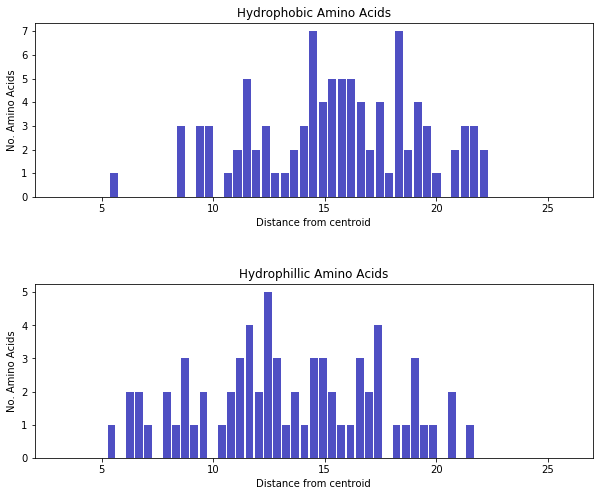

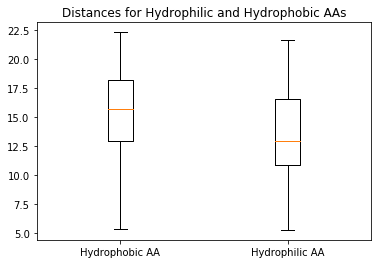

In [202]:
x1 = phob_distances
x2 = phil_distances

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)
ax1.hist(x1, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(2, 27)
ax1.set_title('Hydrophobic Amino Acids')
ax1.set_xlabel('Distance from centroid')
ax1.set_ylabel('No. Amino Acids')

ax2 = fig.add_subplot(212)
ax2.hist(x2, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(2, 27)
ax2.set_title('Hydrophillic Amino Acids')
ax2.set_xlabel('Distance from centroid')
ax2.set_ylabel('No. Amino Acids')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show()

labels = ['Hydrophobic AA', 'Hydrophilic AA']
data = [phob_distances, phil_distances]
fig, ax = plt.subplots()
ax.set_title('Distances for Hydrophilic and Hydrophobic AAs')
ax.boxplot(data, labels = labels)
plt.show()

In [203]:
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"

def search_heterogen(filename, hetatom_name):
    coordinates = []
    with open(filename,'r') as infile:
        for line in infile:
            if line[12:16].strip() == hetatom_name:
                coordinates = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                
    return coordinates

search_heterogen(hetero_file, 'FE')

[69.826, -28.42, -11.877]

In [318]:
coords = [69.826, -28.42, -11.877]
def atom_neighbours(filename, input_coords, number):
    coordinates = get_coords(filename)
    distances = []
    dist_coords = []
    output = []
    numbers = get_numbers(filename)
    
    for coordinate in coordinates:
        distances.append(np.linalg.norm(input_coords-coordinate))
        
    dist_coords_nums = list(zip(distances, coordinates, numbers))
    sorted_dist_coords_nums = sorted(dist_coords_nums)
    
    neighbours = sorted_dist_coords_nums[:number]
    sorted_numbers = [element[2] for element in neighbours]
    
    for element in sorted_numbers:
        with open(filename,'r') as infile:
            for line in infile:
                if (int(line[7:11].strip()) == element):
                    temp = []

                    output_coords = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    temp.append(output_coords)

                    output_number = int(line[7:11].strip())
                    temp.append(output_number)

                    output_residue = line[17:20].strip()
                    temp.append(output_residue)
                    
                    output_resseq = line[22:26].strip()
                    temp.append(output_resseq)

                    output.append(temp)

                    
                
                
    return output

atom_neighbours("atomfile.txt", coords, 5)

[[[63.792, -29.514, -10.362], 571, 'VAL', '69'],
 [[75.875, -29.043, -9.742], 757, 'HIS', '94'],
 [[77.02, -29.553, -14.29], 794, 'HIS', '98'],
 [[72.547, -31.521, -5.296], 729, 'LEU', '90'],
 [[76.607, -24.205, -12.283], 819, 'ILE', '100']]